In [1]:
import json


def read_json(info_file):
    with open(info_file) as f:
        data = json.load(f)
    return data

In [2]:
# Read json file
data = read_json("info/output_info.json")

# Show name of tests
tests_names = list(data.keys())
print("Tests: ", tests_names)

Tests:  ['trilateration_all', 'trilateration_half', 'trilateration_none', 'no_error', 'baseline', 'no_movement_error', 'no_distance_error', 'v8_w2.4', 'v6_w1.8', 'v4_w1.2', 'r80', 'r60', 'r150', 'r200', 'r300', 'localise_1s', 'localise_5s', 'arrow_good', 'arrow_bad']


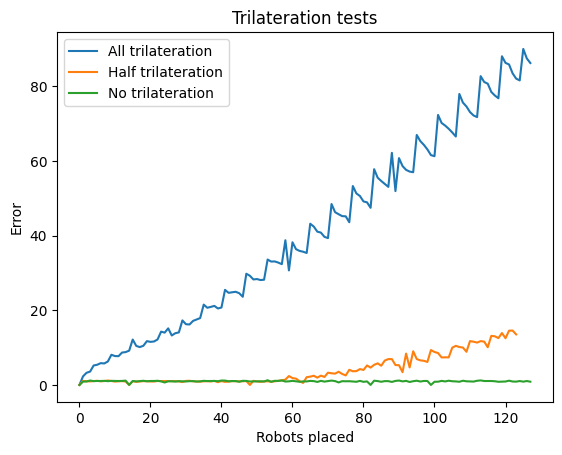

In [3]:
# Error plot of trilateration tests
import matplotlib.pyplot as plt

trilateration_tests = ['trilateration_all', 'trilateration_half', 'trilateration_none']
names = ['All trilateration', 'Half trilateration', 'No trilateration']

for test in trilateration_tests:
    if test in tests_names:
        tests_index = tests_names.index(test)
        name = names[tests_index]
        plt.plot(data[test]['errors'], label=name)
        

plt.xlabel('Robots placed')
plt.ylabel('Error')
plt.legend()
plt.title('Trilateration tests')
plt.show()

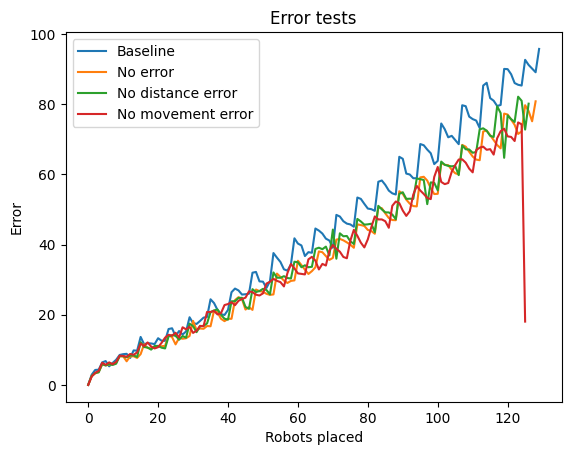

In [4]:
# Plot of error tests
tests = ['baseline', 'no_error', 'no_distance_error', 'no_movement_error']
names = ['Baseline', 'No error', 'No distance error', 'No movement error']

for test in tests:
    if test in tests_names:
        tests_index = tests.index(test)
        name = names[tests_index]
        plt.plot(data[test]['errors'], label=name)

plt.xlabel('Robots placed')
plt.ylabel('Error')
plt.legend()
plt.title('Error tests')
plt.show()



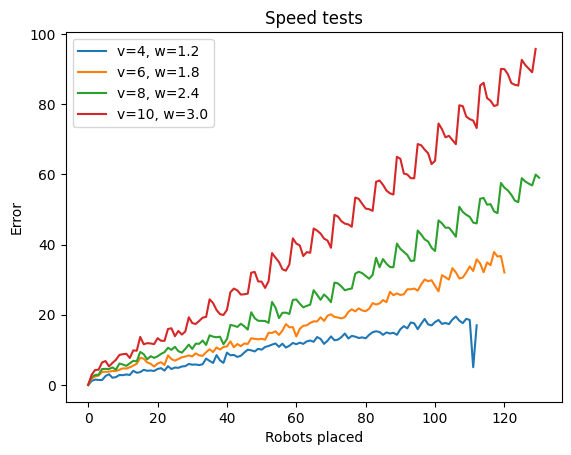

In [5]:
# Tests with diferent speeds
tests = ['v4_w1.2', 'v6_w1.8', 'v8_w2.4', 'baseline']
names = ['v=4, w=1.2', 'v=6, w=1.8', 'v=8, w=2.4', 'v=10, w=3.0']

for test in tests:
    if test in tests_names:
        tests_index = tests.index(test)
        name = names[tests_index]
        plt.plot(data[test]['errors'], label=name)    

plt.xlabel('Robots placed')
plt.ylabel('Error')
plt.legend()
plt.title('Speed tests')
plt.show()

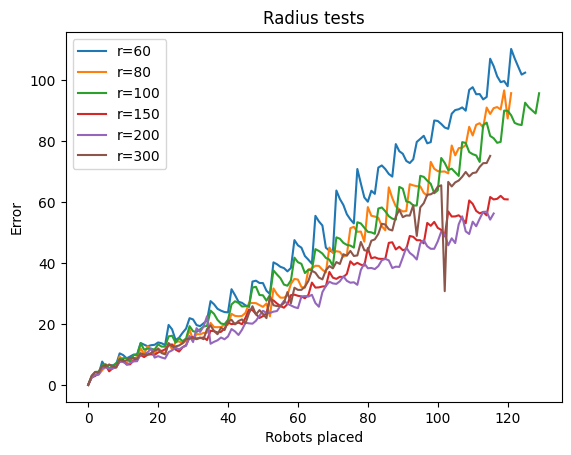

In [6]:
# Test with different radius
tests = ['r60','r80', 'baseline',  'r150', 'r200', 'r300']
names = ['r=60', 'r=80', 'r=100', 'r=150', 'r=200', 'r=300']

for test in tests:
    if test in tests_names:
        tests_index = tests.index(test)
        name = names[tests_index]
        plt.plot(data[test]['errors'], label=name)

plt.xlabel('Robots placed')
plt.ylabel('Error')
plt.legend()
plt.title('Radius tests')
plt.show()

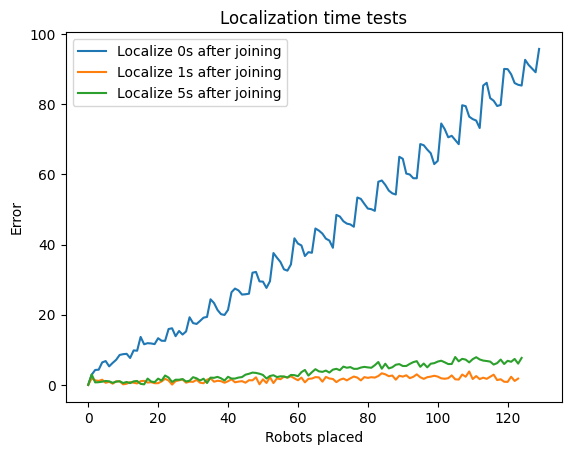

In [7]:
# Test with different localization times after joining shape
tests = ['baseline', 'localise_1s', 'localise_5s']
names = ['Localize 0s after joining', 'Localize 1s after joining', 'Localize 5s after joining']

for test in tests:
    if test in tests_names:
        tests_index = tests.index(test)
        name = names[tests_index]
        plt.plot(data[test]['errors'], label=name)

plt.xlabel('Robots placed')
plt.ylabel('Error')
plt.legend()
plt.title('Localization time tests')
plt.show()

In [8]:
# Create stats for all tests: avg, std
# Also print number of bots and time

print(f"{'Test name':<20} {'n robots':<10} {'Time (s)':<10} {'Avg error':<10} {'Std error':<10}")
for test in tests_names:
    avg = sum(data[test]['errors'])/len(data[test]['errors'])
    std = (sum([(x-avg)**2 for x in data[test]['errors']])/len(data[test]['errors']))**0.5
    # Show with 2 decimals
    print(f"{test:<20} {len(data[test]['errors']):<10} {data[test]['time']:<10.0f} {avg:<10.2f} {std:<10.2f}")

Test name            n robots   Time (s)   Avg error  Std error 
trilateration_all    128        2268       40.75      25.64     
trilateration_half   124        2263       4.01       4.07      
trilateration_none   128        2301       0.96       0.20      
no_error             129        2208       36.86      22.77     
baseline             130        2414       43.24      26.83     
no_movement_error    126        2272       35.29      20.76     
no_distance_error    127        2302       37.20      22.74     
v8_w2.4              131        2831       27.13      16.83     
v6_w1.8              121        3451       17.43      10.05     
v4_w1.2              113        4814       10.36      5.33      
r80                  122        1962       39.91      27.12     
r60                  126        1556       49.75      32.26     
r150                 121        3399       30.71      17.88     
r200                 117        4622       27.45      15.68     
r300                 116 

In [10]:
# Std of robots for tests
import numpy as np
robots = [data[test]['bots'] for test in tests_names]
std_robots = np.std(robots)
print(f"Std robots: {std_robots:.2f}")

Std robots: 5.43
